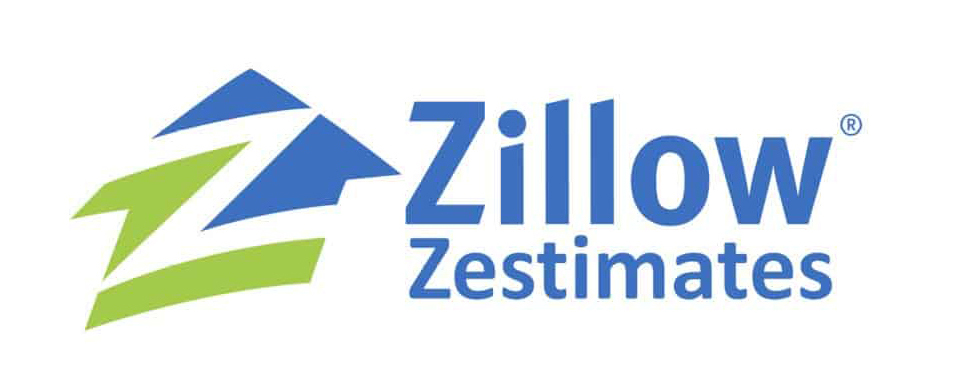

# How Accurate Is Your Zestimates?
by **Meredith Wang** August-9-2022


<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-013243.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-150458.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-2a4d69.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-8DF9C1.svg?logo=matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-65A9A8.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="plotly" src="https://img.shields.io/badge/plotly-adcbe3.svg?logo=plotly&logoColor=white"></a>
<a href="#"><img align="left" alt="sklearn" src="https://img.shields.io/badge/sklearn-4b86b4.svg?logo=scikitlearn&logoColor=white"></a>
<a href="#"><img align="left" alt="SciPy" src="https://img.shields.io/badge/SciPy-1560bd.svg?logo=scipy&logoColor=white"></a>
<a href="#"><img align="left" alt="GeoPandas" src="https://img.shields.io/badge/GeoPandas-1faecf.svg?logo=python-geopandas&logoColor=white"></a>

<h1 align="center">------------ 🏘️ Project Goal ------------</h1>

▪️ Find the key drivers of log error for <span style="color: blue"> **single family properties** </span> in 2017.

▪️ Use clustering methodologies to explore and understand the relationship between features better.

▪️ Construct a Machine Learning Regression model that predict <span style="color: blue"> **log error** </span> of Single Family Properties using attributes of the properties and the useful labels we discovered from clustering.

▪️ Make recommendations on what works or doesn't work in prediction log error.


<h1 align="center">------------ 📃 Project Description ------------</h1>

**Zillow's ZestimateⓇ** is an estimate of value using a proprietary formula created by the online real estate database company. Zestimates cover more than 100 million homes across the United States. A Zestimate is calculated from physical attributes, tax records, and user submitted data.

In this project, we will use statistical analysis to analyze the key drivers of <span style="color: blue">**logerror**</span>, which is defined as:

```
logerror = log(Zestimate) − log(SalePrice)
```

We will incorporate clustering methodologies, and develop a ML regression model to predict the logerror, and provide recommendations on making more accurate prediction on log error which further leads to better prediction on home value predictions.

<h1 align="center">------------ 📝 Initial Questions ------------</h1>

▪️ Are any of the <span style="color: blue">**location features**</span> associated with `logerror`? Is `logerror` significantly different across 3 counties? What about `latitude`, `longtitude`? What about `zip_code`?

▪️ Are any of the <span style="color: blue">**area (in square feet) features**</span>, including `total_sqft`, `lot_sqft`, `living_sqft`, of the property associated with logerror?

▪️ Are any of the <span style="color: blue">**size features**</span>, including bedrroms, bathrooms, full_bath, roomcnt, of the property associated with logerror?

▪️ Is the `age` of the house correlated with `logerror`?

▪️ Is `transaction_month` correlated with `logerror`?

<h1 align="center">------------ 📚 Data Dictionary ------------</h1>

**Variable** |    **Value**    | **Meaning**
---|---|---
<span style="background-color: #ffe0bd">*Latitude*</span> | Float | Latitude of the middle of the parcel
<span style="background-color: #ffe0bd">*Longitude*</span> | Float | Longitude of the middle of the parcel
<span style="background-color: #ffe0bd">*Zip Code*</span> | Integer | Zip code in which the property is located
<span style="background-color: #ffe0bd">*County*</span> | 1) Ventura 2) Los Angeles 3) Orange | County in which the property is located
<span style="background-color: #ffe0bd">*Bedrooms*</span> | Integer | Number of bedrooms in home 
<span style="background-color: #ffe0bd">*Bathrooms*</span> | Float | Number of bathrooms in home including fractional bathrooms
<span style="background-color: #ffe0bd">*Full Bath*</span> | Interger |  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
<span style="background-color: #ffe0bd">*Room Count*</span> | Float |  Total number of rooms in the principal residence
<span style="background-color: #ffe0bd">*Total Sqft*</span> | Float | Calculated total finished living area of the home
<span style="background-color: #ffe0bd">*Living Sqft*</span> | Float | Finished living area
<span style="background-color: #ffe0bd">*Lot Sqft*</span> | Float | Area of the lot in square feet
<span style="background-color: #ffe0bd">*Assessed Value*</span> | Float | The total tax assessed value of the parcel
<span style="background-color: #ffe0bd">*Structure Value*</span> | Float | The assessed value of the built structure on the parcel
<span style="background-color: #ffe0bd">*Land Value*</span> | Float | The assessed value of the land area of the parcel
<span style="background-color: #ffe0bd">*Tax Amount*</span> | Float | The total property tax assessed for that assessment year
<span style="background-color: #ffe0bd">*Age*</span> | Integer | This indicate the age of the property in 2017, calculated using the year the principal residence was built 
<span style="background-color: #ffe0bd">*Transaction Month*</span> | Integer | The month in 2017 that the property is sold

Note: Full dictionary please reference [zillow_data_dictionary](zillow_data_dictionary.xlsx)

<h1 align="center">------------ 🧮 Wrangle Zillow Data ------------</h1>

## 1. Data Acquisition
▪️ Stored the sensitive data in an **env.py** file in order to get conncetion to the mySQL server and abtain our data.

▪️ To acquire the zillow data for singel family properties, I used the **zillow** database in the mySQL server, and joined the following tables to gather data: <samp>`properties_2017, predictions_2017, propertylandusetype, airconditioningtype, architecturalstyletype, buildingclasstype, heatingorsystemtype, propertylandusetype, storytype, typeconstructiontype`</samp>

▪️ Created **acquire.py** and user-defined function `get_zillow_data()` to acquire and cache data.

In [1]:
# Import essential libraries
from imports import *

# Set up display format
pd.options.display.float_format = '{:,.3f}'.format

# set columnns display format
pd.set_option('display.max_columns', None)

# Calling the function to make the connection to database, run the query, and store the table in the form of a dataframe
messy_df = acquire.get_zillow_data()

# Check the shape of our messy dataframe
messy_df.shape

(52438, 67)

## 2. Missing Values Analysis

<AxesSubplot:>

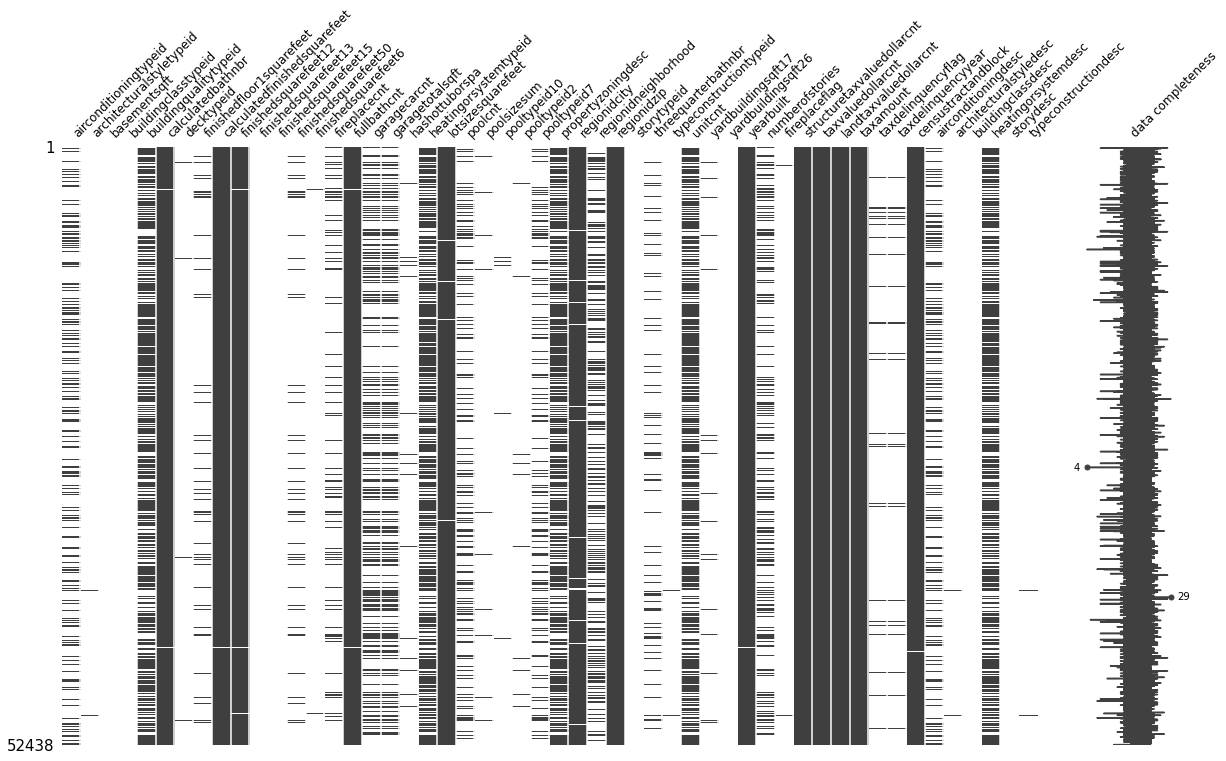

In [2]:
# Visualizing missing values
missingValueColumns = messy_df.columns[messy_df.isnull().any()].tolist()
msno.matrix(messy_df[missingValueColumns], width_ratios = (10, 1), \
           figsize=(20,11), fontsize = 12, sparkline=True, labels = True)

## 3. Data Preparation - Data Cleaning 🧹 
▪️ **Missing Values (NaN):**
- Drop columns and rows that have more than <span style="color: blue">**25% missing data**</span>
    
- All other null values are <span style="color: blue"> **dropped** </span>

- We feel comfortable dropping null values because that's **3.4%** of the entire dataset

▪️ **Rename Columns**
- Ensure all columns have meaningful and short names

▪️ **Data Conversion/Imputation**
- Convert `yearbuil` to `age`

- Convert `taxamount` to `taxrate`

- Extract month from `transaction_date`

- Convert `latitude` and `longitude` to the correct digit

▪️ **Join Tables**
- Join table [address.csv](address.csv) which has the correct zip code for properties (derived from geo engineering)

- Join table [logerror_zip.csv](logerror_zip.csv) which utilized T-test to decide the significancy of logerrors corresponding to each zip code

▪️ **Data Mapping:**
- Created new column `county` corresponding to `fips_code`

- Create new `zip_bin` column with category name corresponding to each `zip_group`

▪️ **Dummy variables**
- Create dummy variables for binary and non-binary categorical variables

- Contatenate dummy variables onto original dataframe


▪️ **Data Types:**
- Column `age`, `zip_code`, `transaction_month` is converted to correct datatype

▪️ **Outliers:**
- Upper bound: <span style="color: blue"> **Q3 + 1.5 * IQR** </span>
- Lower bund: <span style="color: blue"> **Q1 - 1.5 * IQR** </span>
- Each column is adjusted based on distribution

In [2]:
# Cleaning the data using function from prepare.py
df = prepare.prep_zillow(messy_df)

# Checking the shape of our cleaned dataframe
df.shape

(45130, 28)

## 4. Data Preparation - Splitting Data 🗂

In [3]:
# Split the data into train, validate, test using user-defined function from prepare.py
train, validate, test = prepare.split(df)

# Checking the size of each dataset
train.shape, validate.shape, test.shape

((25272, 28), (10832, 28), (9026, 28))

***

<h1 align="center">------------ 📊 Data Context ------------</h1>

We have data of **45130** single family properties. **6** categorical variables and **10** numerical variables.

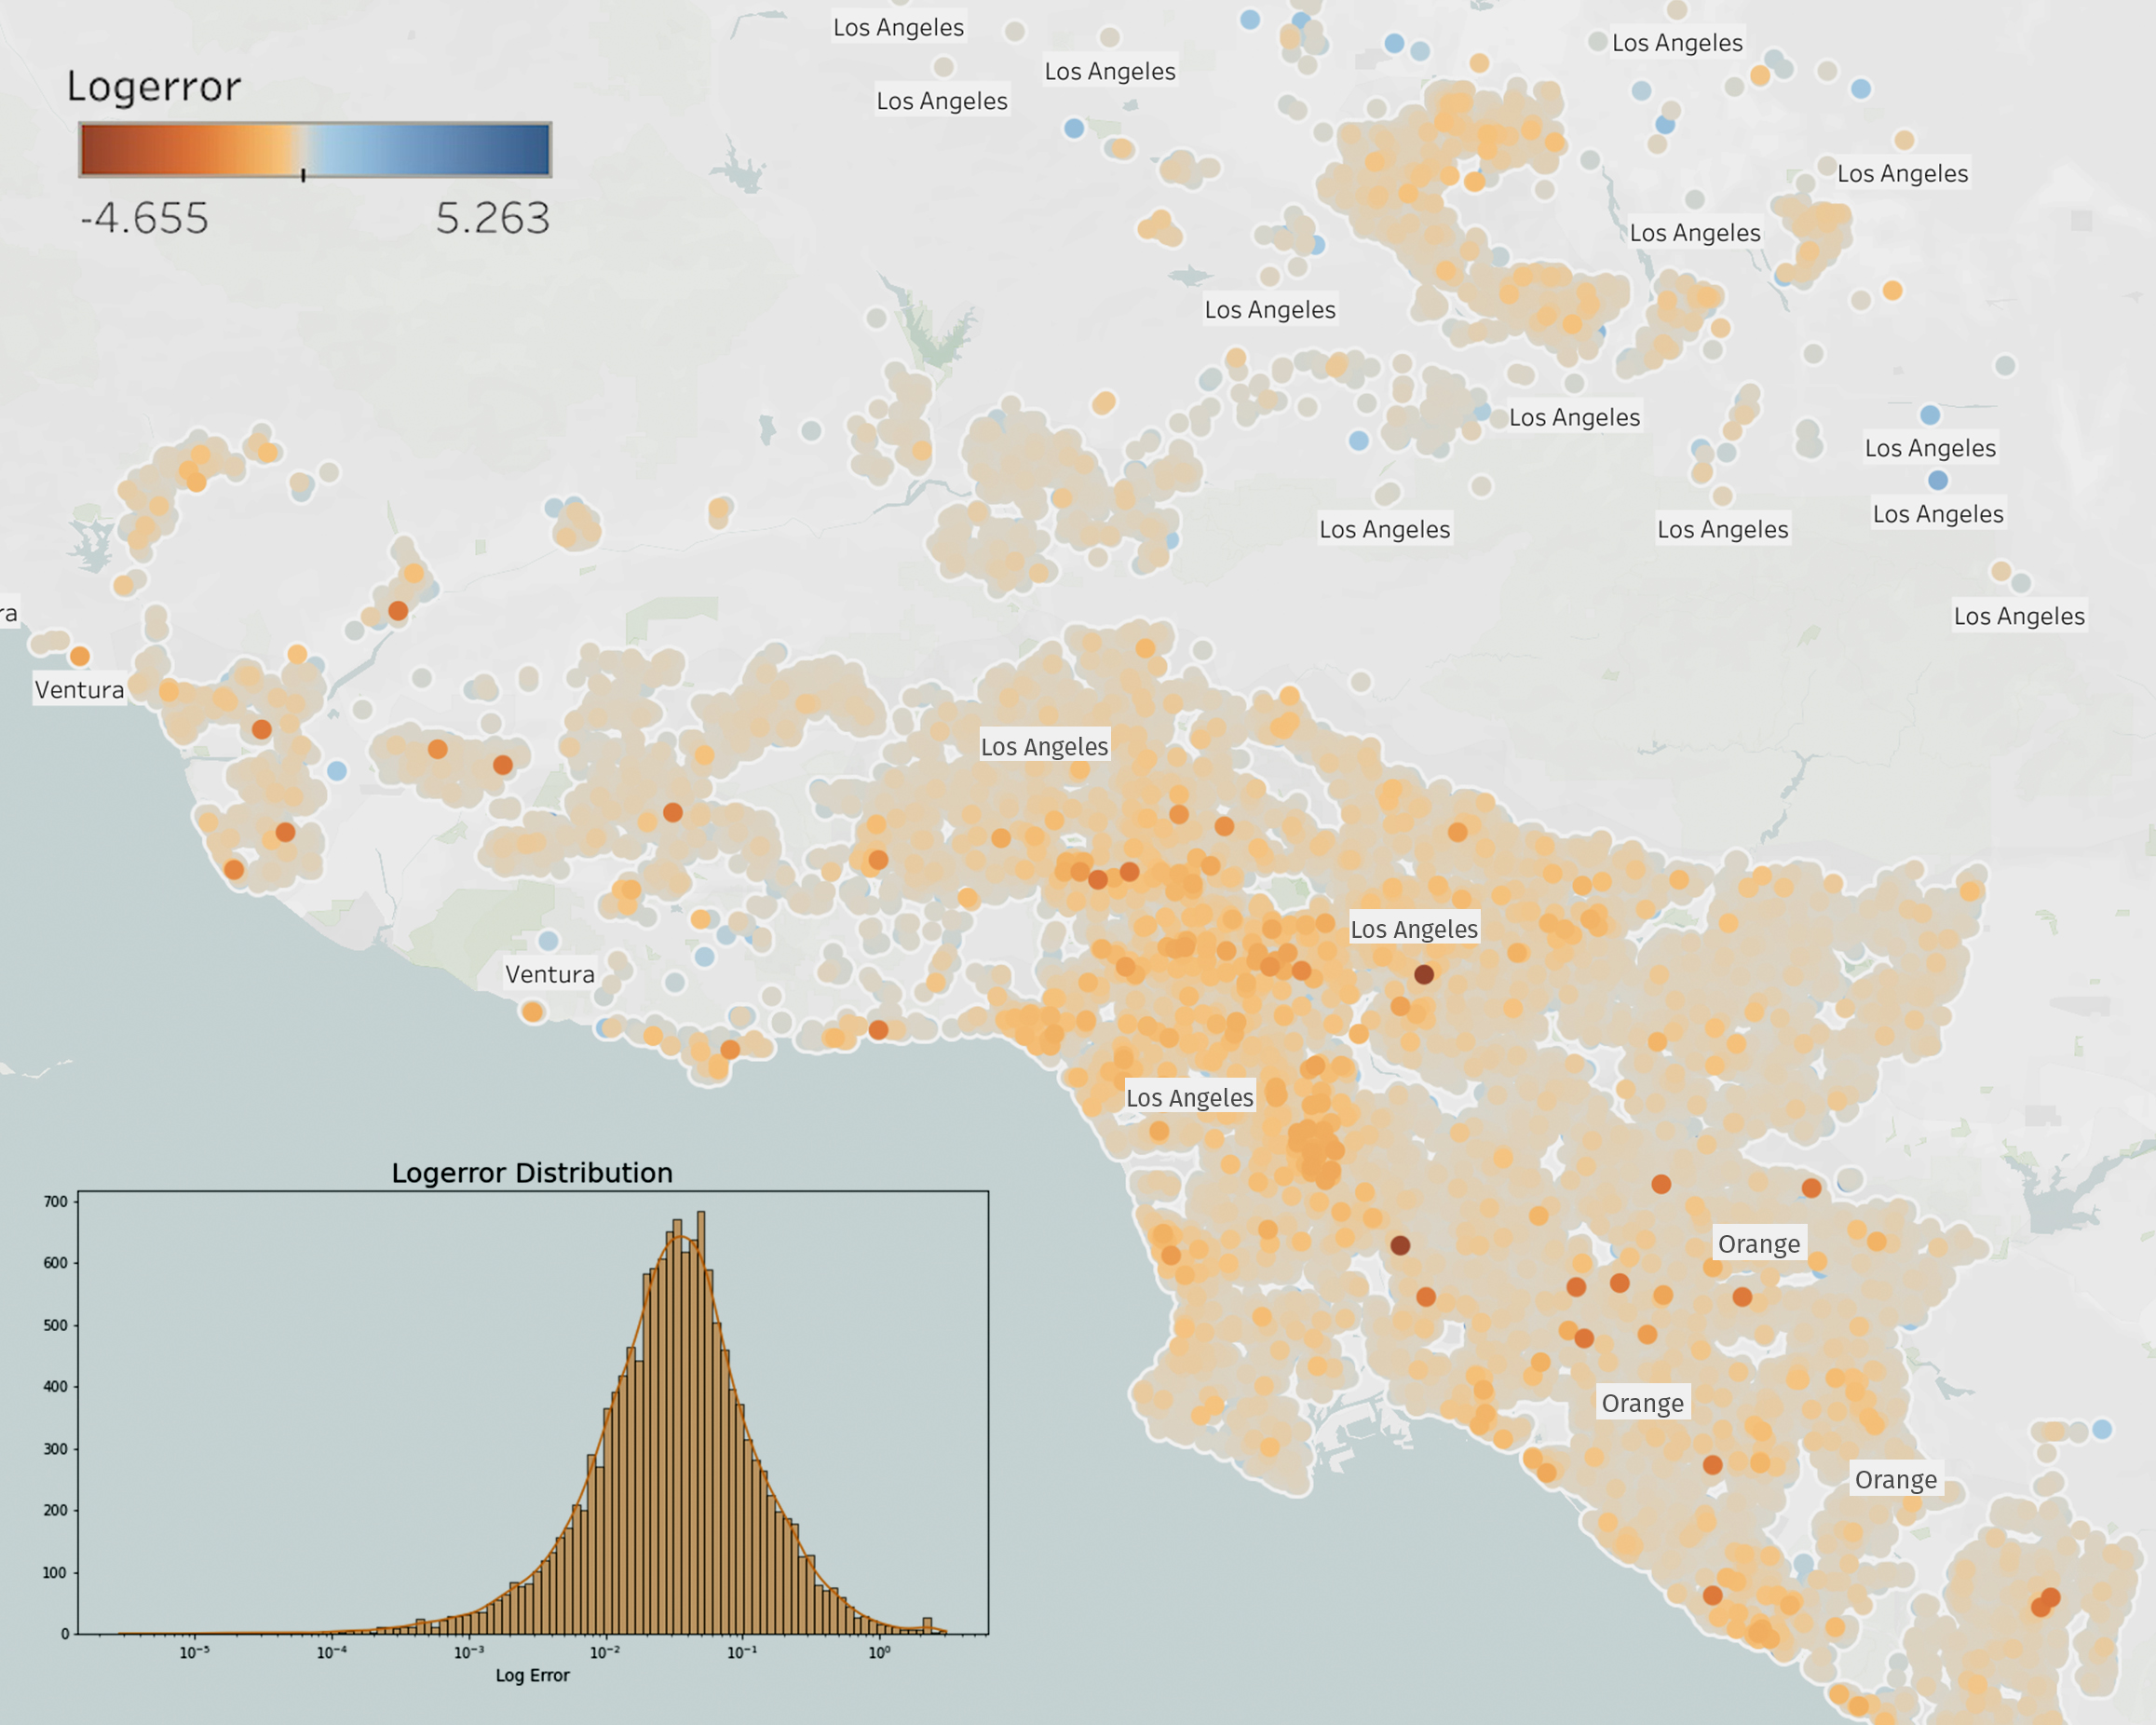

***

<h1 align="center">------------ 👩🏻‍💻 Exploratory Analysis ------------</h1>

▪️ <span style='background :orange' > **Location** </span> (`latitude`, `longitutde`, `zip_code`, `county`)

▪️ <span style='background :orange' > **Area** </span> (`living_sqft`, `total_sqft`, `lot_sqft`)

▪️ <span style='background :orange' > **Size** </span> (`bedrooms`, `bathrooms`, `full_bath`, `roomcnt`)

▪️ <span style='background :orange' > **Value** </span> (`structure_value`, `land_value`, `assessed_value`)

▪️ <span style='background :orange' > **Age** </span>

▪️ <span style='background :orange' > **Transaction month** </span>


## Question 1: How are location features associated with logerror?

### Is log error significantly different across different counties?

Text(0.5, 1.0, 'Logerror by County')

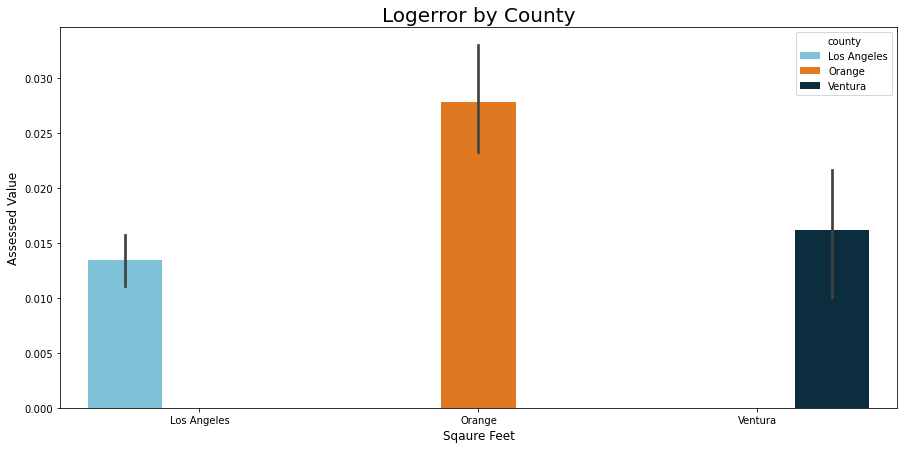

In [4]:
# Visualizing log error mean across counties
plt.figure(figsize=(15,7))
sns.barplot(x='county', y='logerror',hue = 'county', palette = ['#6ecae6','#fD7702','#023047'], data = train)
plt.xlabel('Sqaure Feet', fontsize = 12)
plt.ylabel('Assessed Value', fontsize = 12)
plt.title('Logerror by County', fontsize = 20)

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Logerror of Los Angeles, Orange, and Ventura County are all equal.

$H_{a}$: Logerror of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal.


**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

In [5]:
losangeles = train[train['county'] == 'Los Angeles'].logerror
orange = train[train['county'] == 'Orange'].logerror
ventura = train[train['county'] == 'Ventura'].logerror
# Set alpha
alpha = 0.05

# Comparing mean of 3 independent samples
t, p = stats.f_oneway(losangeles, orange, ventura)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of log error of Los Angeles, Orange, and Ventura County are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of log error of Los Angeles, Orange, and Ventura County are not all equal. 


### What about latitude, longitude?

▪️ **No obvious visual clusters** solely based on latitude and longitude

### What about zip code?

▪️ Conduct **one-sample T-test** on each zip code

▪️ Compare how much the **sample's mean** differ from the **overall mean**
``` sh
t, p = stats.ttest_1samp(sample, overall_mean)
alpha = 0.5
    if p/2 < alpha:
        print(logerror_zip['zip_code'][row])
        if t>0:
            print('Significantly High')
        else:
            print('Significantly Low')
    if p/2 >= alpha:
        print(logerror_zip['zip_code'][row])
        if t>0:
            print('Insignificantly High')
        else:
            print('Insignificantly Low')
```
▪️ Zip codes are binned into 4 groups based on their `p` and `t` value

Text(0.5, 1.0, 'Logerror by Zip Code Bin')

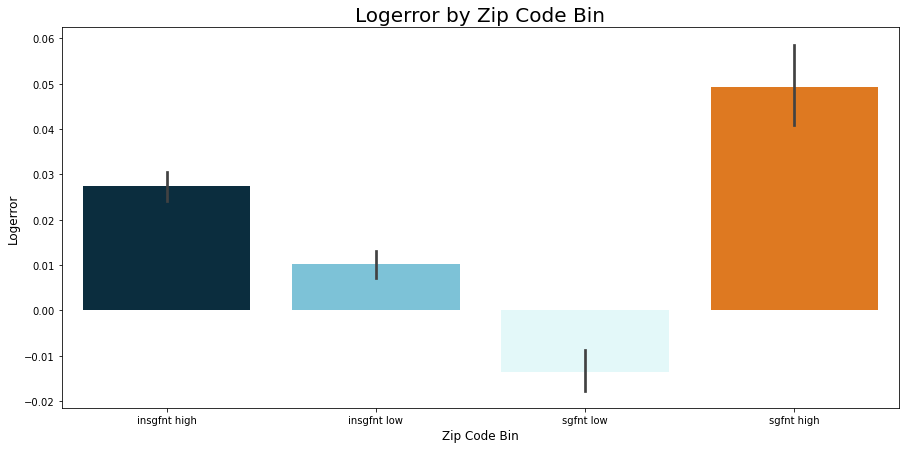

In [6]:
# Visualizing logerror zip code bins
plt.figure(figsize=(15,7))
sns.barplot(x='zip_bin', y='logerror', palette = ['#023047','#6ecae6','#e0fbfc','#fD7702'], data = train)
plt.xlabel('Zip Code Bin', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Zip Code Bin', fontsize = 20)

<AxesSubplot:title={'center':'Logerror by Location Clusters'}, xlabel='Latitude', ylabel='Longitude'>

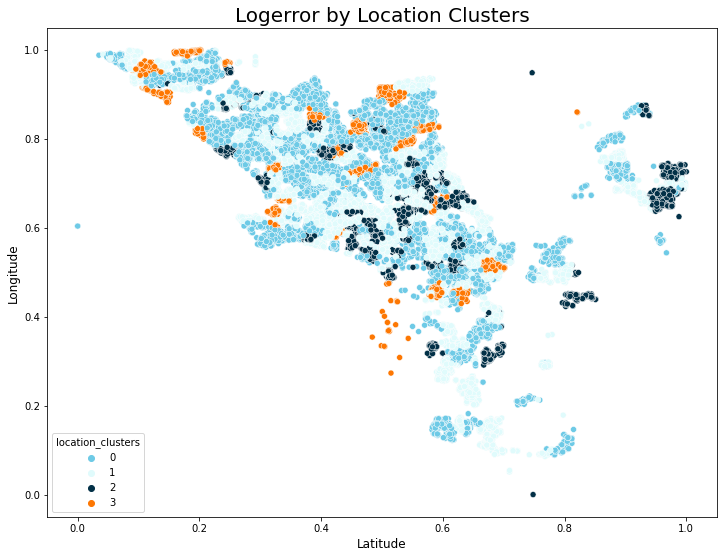

In [4]:
# Scaling data for clustering
s_train, s_validate, s_test = prepare.split_scale(df)
# Adding location cluster onto dataframe
s_train,s_validate,s_test = clustering.location_clusters(s_train, s_validate, s_test)
# Visualizng location clusters
plt.figure(figsize = (12,9))
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Longitude', fontsize = 12)
plt.title('Logerror by Location Clusters', fontsize = 20)
sns.scatterplot(x='latitude', y='longitude', hue = 'location_clusters', palette = ['#6ecae6','#e0fbfc','#023047','#fD7702' ], data=s_train)

## Answer 1:

### Logerror is <span style="color: blue"> significantly different </span> acorss counties. 

### Latitude and longitude have  <span style="color: blue">weak-to-no correlation </span> with logerror. 

### Zip codes are binned based on t-test positive correlation .

---

##  Question 2: How are area features (in square feet)  associated with logerror?

#### `living_sqft`, `total_sqft`, `lot_sqft`

<AxesSubplot:title={'center':'Logerror by Area in Square Feet'}, xlabel='Area in Square Feet', ylabel='Logerror'>

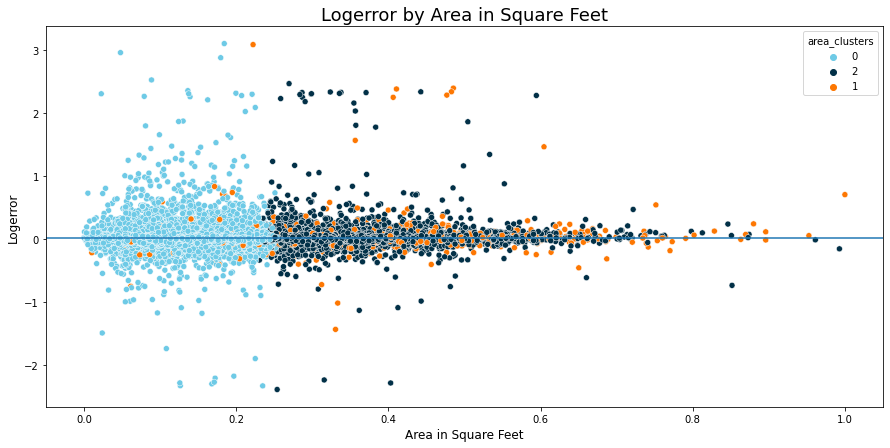

In [7]:
# Adding area cluster onto dataframe
s_train, s_validate, s_test = clustering.area_clusters(s_train, s_validate, s_test)

# Visualizng location clusters
plt.figure(figsize=(15,7))
plt.xlabel('Area Clusters', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Area Clusters', fontsize = 20)
plt.axhline(s_train.logerror.mean())
plt.xlabel('Area in Square Feet', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Area in Square Feet', fontsize = 18)
sns.scatterplot(x='living_sqft', y='logerror', hue = 'area_clusters', palette = ['#6ecae6','#023047', '#fD7702' ], data= s_train)

<AxesSubplot:title={'center':'Logerror by Area Clusters'}, xlabel='area_clusters', ylabel='logerror'>

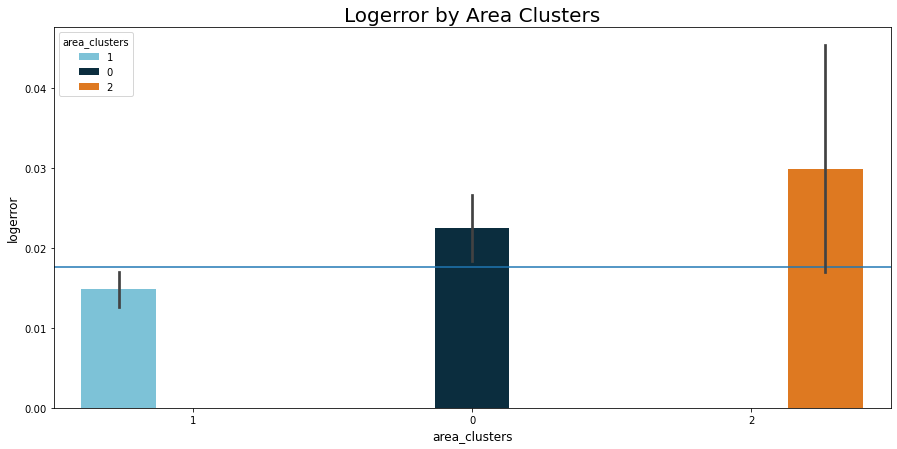

In [5]:
# Visualizng location clusters
plt.figure(figsize=(15,7))
plt.xlabel('Area Clusters', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Area Clusters', fontsize = 20)
plt.axhline(s_train.logerror.mean())
sns.barplot(x='area_clusters', y='logerror', hue = 'area_clusters', palette = ['#6ecae6','#023047', '#fD7702' ], data= s_train)

## Answer 2:
### Properties that are <span style="color: blue">larger</span> than 2200sqft have <span style="color: blue">higher</span> logerror on average.
### <span style="color: blue">Smaller</span> houses have <span style="color: blue">smaller</span> logerror on average.

***

##  Question 3: How are size (rooms) features associated with logerror?

#### `bedrooms`, `bathrooms`, `full_bath`, `roomcnt`

In [57]:
# Visualizing logerror per bedrooms and bathrooms
fig = px.scatter_3d(df, x='bedrooms', y='bathrooms', z='logerror',
              color='logerror',color_continuous_scale='gnbu')
fig.update_layout(width=950, height=700)
fig.show()

### ANOVA Test
**Set Hypothesis**

$H_{0}$: The mean of logerror of 3 size clusters are all equal.

$H_{a}$: The mean of logerror of 3 size clusters are not all equal.

In [16]:
# Set alpha
alpha = 0.05

# Specify each sample
cluster0 = s_train[s_train.size_clusters==0].logerror
cluster1 = s_train[s_train.size_clusters==1].logerror
cluster2 = s_train[s_train.size_clusters==2].logerror

# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 value clusters are not all equal. ')
else:
    print(Fore.BLUE +'We fail to reject H0')

We fail to reject H0


### Answer 3:
### Properties with <span style="color: blue">more </span>  bedrooms and bathrooms have <span style="color: blue">higher</span> logerror on average.
### Properties with <span style="color: blue">less </span>  bedrooms and bathrooms have <span style="color: blue">smaller</span> logerror on average.

***

##  Question 4: How are value features associated with logerror?

#### `structure_value`, `land_value`, `assessed_value`

<AxesSubplot:title={'center':'Logerror by Land Value'}, xlabel='Land Value', ylabel='Logerror'>

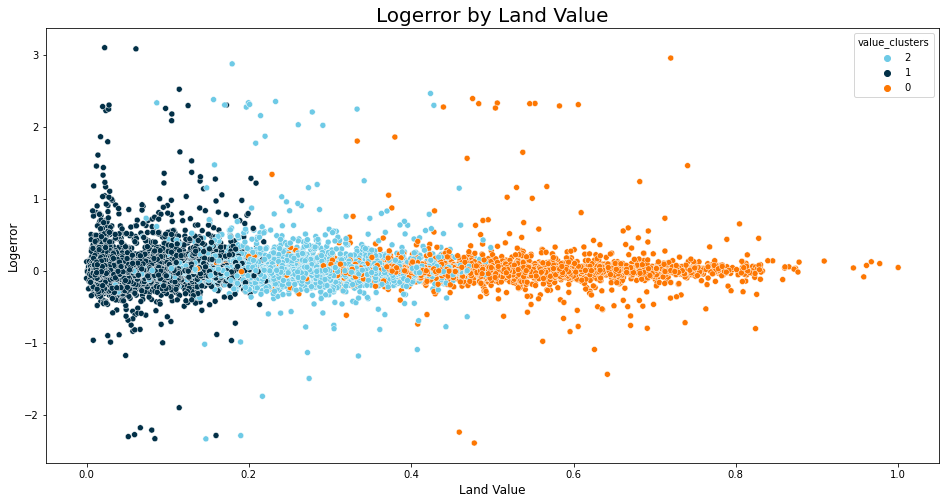

In [12]:
# Adding size cluster onto dataframe
s_train, s_validate, s_test = clustering.value_clusters(s_train, s_validate, s_test)

# Visualizing logerror per land value
plt.figure(figsize = (16,8))
plt.xlabel('Land Value', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Land Value', fontsize = 20)
sns.scatterplot(x='land_value', y='logerror', hue='value_clusters', palette=['#6ecae6','#023047', '#fD7702'], data = s_train)

### ANOVA Test
**Set Hypothesis**

$H_{0}$: The mean of logerror of 3 value clusters are all equal.

$H_{a}$: The mean of logerror of 3 value clusters are not all equal.

In [17]:
# Set alpha
alpha = 0.05

# Specify each sample
cluster0 = s_train[s_train.value_clusters==0].logerror
cluster1 = s_train[s_train.value_clusters==1].logerror
cluster2 = s_train[s_train.value_clusters==2].logerror

# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print('\nMean of 3 value clusters are not all equal. ')
else:
    print(Fore.BLUE +'We fail to reject H0')

We fail to reject H0


## Answer 4:
### Properties with <span style="color: blue">lower </span> value have <span style="color: blue">higher</span> logerror on average.
### Properties with <span style="color: blue">higher </span>  value have <span style="color: blue">smaller</span> logerror on average.

***

## Questiont 5: Is the <span style="color: blue">age</span> of the house correlated with <span style="color: blue">logerror</span>?


<AxesSubplot:title={'center':'Logerror by Age'}, xlabel='Age of the Property', ylabel='Logerror'>

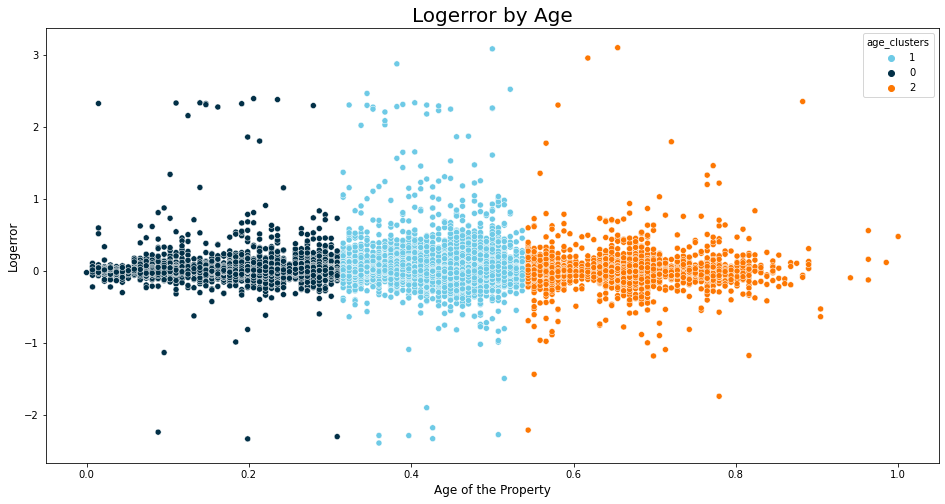

In [81]:
# Adding age clusters to dataframe
s_train, s_validate, s_test = clustering.age_clusters(s_train, s_validate, s_test)
# Visualizing logerror by age, hue by age clusters
plt.figure(figsize = (16,8))
plt.xlabel('Age of the Property', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Age', fontsize = 20)
sns.scatterplot(x='age', y='logerror', hue='age_clusters', palette=['#6ecae6','#023047', '#fD7702'], data = s_train)

### Pearson R
**Set Hypothesis**

$H_{0}$: Age of the property is not correlated with logerror.

$H_{a}$: Age of the property is correlated with logerror.

In [22]:
# Set alpha
alpha = 0.05

# Pearson R test
corr, p = stats.pearsonr(s_train.age, s_train.logerror)
corr, p
# Determine if there's a correlation
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nAge of the property is correlated with logerror. ')
else:
    print(Fore.BLUE +'We fail to reject H0')

We reject H0.

Age of the property is correlated with logerror. 


## Answer 5:
### Properties that are  <span style="color: blue">older </span> than 75 years have lower logerror on average.
### Properties that are in between 40 to 75 years have <span style="color: blue"> higher </span>logerror on average.

***

## 🔑 Key Takeaways:

▪️ Logerror is dependent on location features. <span style="color: blue"> Location clusters </span> are relevant and useful for estimating logerror.

▪️ Area features have <span style="color: blue"> weak </span> correlation with logerror. Area clusters seem relevant judging from the bra graph, but the ANOVA test concludes there's no significant difference between clusters.

▪️ Size features have <span style="color: blue"> weak </span> correlation with logerror. We can see the relationship from visualizing clusters but the ANOVA test concludes there's no significant difference between clusters.

▪️ Value features have <span style="color: blue"> weak </span> correlation with logerror. Although the visualization tells us there's a negative correlation between them, the ANOVA test concludes there's no significant difference between clusters.


▪️ Features that will be included in models:
- location clusters
- area clusters
- size clusters
- value clusters
- age
- transaction month

(Each feature is a driver of property tax assessed value, supported by visualization and statistical testing. For lot size and age analysis please reference [zillow_eda](zillow_eda.ipynb))

<h1 align="center">------------ 🧪 Modeling ------------</h1>

## Baseline Prediction

In [14]:
# Creating dummy vairables for all clusters
train, validate, test = clustering.clusters_dummy(s_train,s_validate,s_test)

# Train dataset's baseline prediction
train_predictions, validate_predictions, test_predictions = modeling.baseline_prediction(train, validate, test)


Root mean of squared error of baseline prediction is:       0.163


#### 📌  All models will be evaluated with <span style="color: blue"> Root Mean Squared Error (RMSE) </span>

## 3 Feature Combinations, 2 Algorithms

▪️ **Combination A**: Age Clusters, Location Clusters, Size Clusters, Value Clusters

▪️ **Combinatinon B**: Value Clusters, Location Clusters

▪️ **Combinatinon C**: Age Clusters, Location Clusters, Area Clusters, Size Clusters, Value Clusters

▪️ **Algorithms**:
1. Multiple Regression + RFE

2. Polynomial Features

**NOTE**: Each model is created based on the parameter that generates the highest performance. Please reference [modeling](modeling.ipynb) notebook for detail experimentation process.

## Train Evaluation (6 Models)

In [15]:
# Calling function to create multiple regression and polynomial features model on each feature combination
train_predictions, validate_predictions, test_predictions = modeling.feature_a_models(train, validate, test, train_predictions, validate_predictions, test_predictions)
train_predictions, validate_predictions, test_predictions = modeling.feature_b_models(train, validate, test, train_predictions, validate_predictions, test_predictions)
train_predictions, validate_predictions, test_predictions = modeling.feature_c_models(train, validate, test, train_predictions, validate_predictions, test_predictions)

In [21]:
# Calculating rmse of each model's performance on train and concluded the top 3 models
def calculate_rmse(y_predicted):
    return mean_squared_error(train_predictions.actual, y_predicted, squared = False)
print("TOP 3 MODELS:")
print(Fore.BLUE+"1. Comb B Polynomial degree=2 \n2. Comb C Multiple Regression + RFE k=6 \n3. Comb B Multiple Regression + RFE k=9")

TOP 3 MODELS:
1. Comb B Polynomial degree=2 
2. Comb C Multiple Regression + RFE k=6 
3. Comb B Multiple Regression + RFE k=9


## Top 3 Models Validate Evaluation

[(0.157, 0.163)]

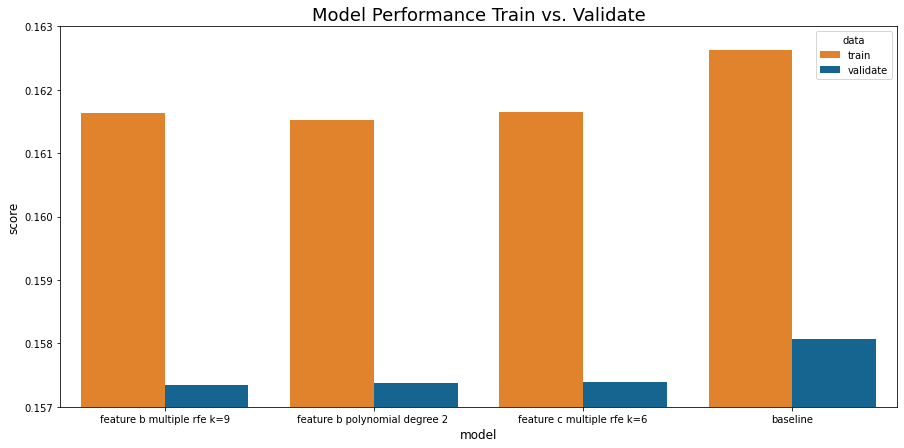

In [20]:
# Visualizing model performance
plt.figure(figsize = (15,7))
# Load model performance from csv
model = pd.read_csv('model_performance.csv')
plt.title('Model Performance Train vs. Validate', fontsize = 18)
plt.xlabel('Models', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
g = sns.barplot(x='model', y='score', hue='data', data = model, palette = ['#ff800e','#006ba4'])
g.set(ylim=(0.157, 0.163))

#### 📌  None of the models appear to be overfit. We will move on with the best performing model: <span style="color: blue"> feature b polynomial degree 2</span>

## Top 1 Model Test Evaluation

In [18]:
# Displaying rmse of each model's performance on train
def calculate_rmse(y_predicted):
    return mean_squared_error(test_predictions.actual, y_predicted, squared = False)

test_predictions.apply(calculate_rmse).sort_values()

actual                                           0.00000
feature c multiple rfe k=6                       0.17744
feature b polynomial degree 2                    0.17744
feature b multiple rfe k=9                       0.17744
feature a polynomial degree 2 only interaction   0.17749
feature a multiple rfe k=15                      0.17770
feature c polynomial degree 2                    0.17771
baseline                                         0.17847
dtype: float64

In [22]:
rmse = mean_squared_error(test_predictions.actual, test_predictions['feature b polynomial degree 2'], squared = False)
print(Fore.BLUE+"feature b polynomial degree 2 RMSE on test: ", "{:10.2f}".format(rmse), '\nModel performance is 0.58% better than baseline.')

feature b polynomial degree 2 RMSE on test:        0.18 
Model performance is 0.58% better than baseline.


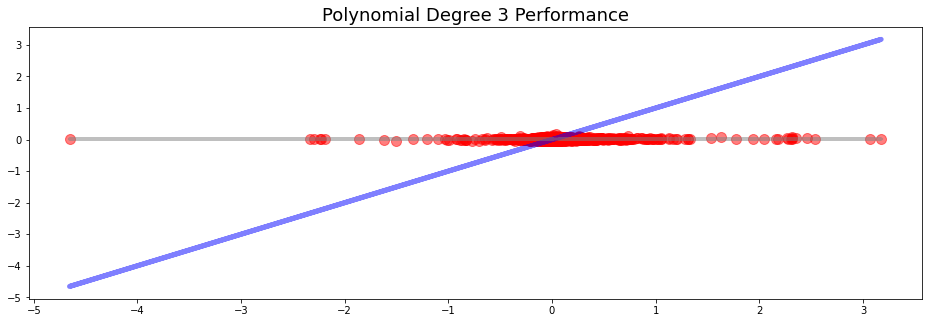

In [26]:
# Visualizing how the model will perform against actual assessed value
plt.figure(figsize=(16,5))
# Plotting actual assessed values
plt.plot(test.logerror,test.logerror, alpha=0.5, linewidth=5, color='blue')
plt.title('Polynomial Degree 3 Performance', fontsize = 18)
# Plotting baseline predictions
plt.plot(test.logerror,test_predictions['baseline'], alpha=0.5, linewidth=3,color='grey', label = 'baseline prediction')
# Plotting polynomial model predictions
plt.scatter(test_predictions['actual'],test_predictions['feature b polynomial degree 2'], alpha = 0.5, color = 'red', s=100)

***

<h1 align="center">------------ 🔆 Conclusion ------------</h1>

## Summary

▪️ **Location** has a strong correlation with logerror.

▪️ Area, size, value clusters are somewhat relevant, but models tend to perform better with the features used in clusters instead of the clusters themselves.

▪️ Value features have a **negative weak correlation** with logerror.

▪️ The age of the property has a **negative weak correlation** with logerror.

▪️ The polynomial features model will perform within a variance of <span style='background :orange' >**0.177**</span> on future onseen data.

## Recommendations

▪️ Impute null values instead of dropping them.

▪️ Handle outliers differently, or save the outliers so that the final model will have better prediction on future onseen data.

▪️ Experiment with more feature combinations and different algorithms.

▪️ To make better predictions, we need to gather more accurate **geographical data**. In this dataset we're given, the `regionidcity`, `regionidzip` etc. are not accurate.

## Next Steps

## Credit

▪️ Geo engineering features (specifially `zip_code` in this project) credit to **Joshua Mayes**.